In [1]:
import numpy as np
from matplotlib import pyplot as plt
import time



In [2]:
# utility function: random tie breaking
def randmax(A):
    indices = [i for i in range(len(A)) if A[i]==np.max(A)]
    return np.random.choice(indices)


class Bernoulli_bandit:
    
    def __init__(self, mus):
        self.mus = mus
        self.max_mu = np.max(mus)
        self.n_arms = len(mus)
        
    def draw(self, arm):
        return(np.random.binomial(1, p=mus[arm]))

        
# run an alg on a bandit for T iterations and N_exp repetitions
def multiple_runs(bandit, alg, T, N_exp):
    np.random.seed()
    expected_regrets = np.zeros((N_exp, T))
    actual_regrets = np.zeros((N_exp, T))
    for n in range(N_exp):
        alg.refresh()
        expected_regret,actual_regret = alg.run()
        expected_regrets[n, :] = expected_regret
        actual_regrets[n, :] = actual_regret
        
    return (expected_regrets,actual_regrets)


 

class Thompson_sampling:

    def __init__(self, mab, T, a=1, b=1):
        self.mab = mab
        self.T = T
        self.n_arms = mab.n_arms
        self.a = a
        self.b = b
        self.n_draws = np.zeros(self.n_arms)
        self.cum_rewards = np.zeros(self.n_arms)
        
    def refresh(self):
        self.n_draws = np.zeros(self.n_arms)
        self.cum_rewards = np.zeros(self.n_arms)
        
    def action(self):
        posteriors = np.zeros(self.n_arms)
        for kk in range(self.n_arms):
            posteriors[kk]= np.random.beta(self.cum_rewards[kk]+self.a, self.n_draws[kk]-self.cum_rewards[kk]+self.b)
        return randmax(posteriors)

    def receive_reward(self,arm):
        reward = self.mab.draw(arm)
        self.cum_rewards[arm] = self.cum_rewards[arm] +reward
        self.n_draws[arm] = self.n_draws[arm] +1
        return(reward)


    def run(self):
        T = self.T
        max_mu = self.mab.max_mu
        mus = self.mab.mus
        expected_regret = np.zeros(T)
        actual_regret = np.zeros(T)

        for t in range(T):
            a_t = self.action()
            reward = self.receive_reward(a_t)
            expected_regret[t] = expected_regret[t-1]+max_mu-mus[a_t]
            actual_regret[t] = actual_regret[t-1]+max_mu-reward
            
        return(expected_regret,actual_regret)



# set up the bandits and algs and plot the actual rewards

In [3]:
N_exp = 1000
T = 2500
mus = mus = [0.4,0.6]

bandit = Bernoulli_bandit(mus)



alg = Thompson_sampling(bandit, T)


expected_regrets,actual_regrets = multiple_runs(bandit, alg, T, N_exp)


[10.072 10.101 10.116 10.135 10.151 10.149 10.153 10.154 10.161 10.16 ] -31.099999999999362 52.000000000002665
76.9015212059021


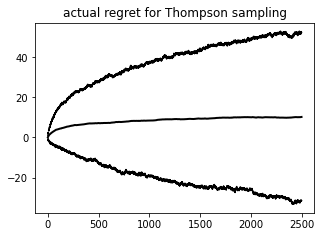

In [4]:
fig, ax = plt.subplots(1,1,figsize=(5,3.5))

ax.plot(np.arange(T), np.mean(actual_regrets, 0), linewidth=2.0, color='k')
ax.plot(np.arange(T), np.quantile(actual_regrets, 0.95, 0), np.arange(T), np.quantile(actual_regrets,0.05,0), linestyle="dashed", color='k')
ax.set_title('actual regret for Thompson sampling')
plt.show()